
STAR DATA ANALYSIS PIPELINE
Loading data from file: final_star_asteroid_data_filled.csv

DUPLICATE CHECK
✓ No duplicate rows found.

MISSING VALUES CHECK
✓ No missing values found.

DATA TYPE VALIDATION
✓ 'Temperature (K)' is already numeric (int64)
✓ 'Luminosity(L/Lo)' is already numeric (float64)
✓ 'Radius(R/Ro)' is already numeric (float64)
✓ 'Absolute magnitude(Mv)' is already numeric (float64)
✓ 'Star type' is already numeric (int64)
✓ 'Peak Wavelength (nm)' is already numeric (float64)
✓ 'Volume (km^3)' is already numeric (float64)
✓ 'Habitable Zone Start (AU)' is already numeric (float64)
✓ 'Habitable Zone End (AU)' is already numeric (float64)

BASIC DATASET INFORMATION
The dataset has 246 rows and 14 columns.

First 5 rows:
   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068       2.40000e-03   1.70000e-01             1.61200e+01   
1             3042       5.00000e-04   1.54200e-01             1.66000e+01   
2             2600    

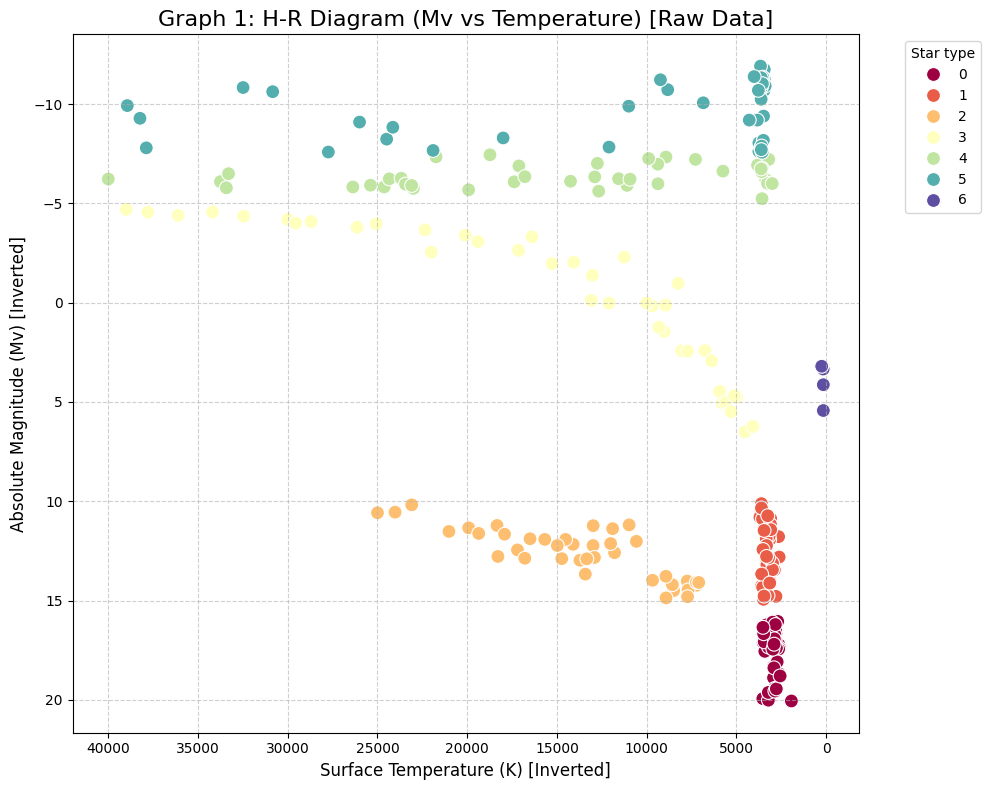

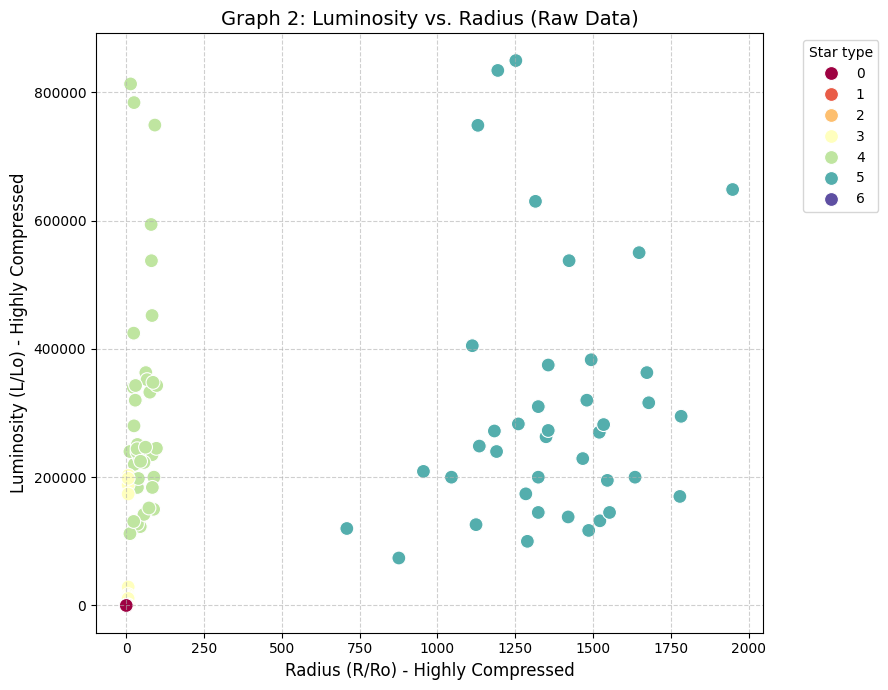

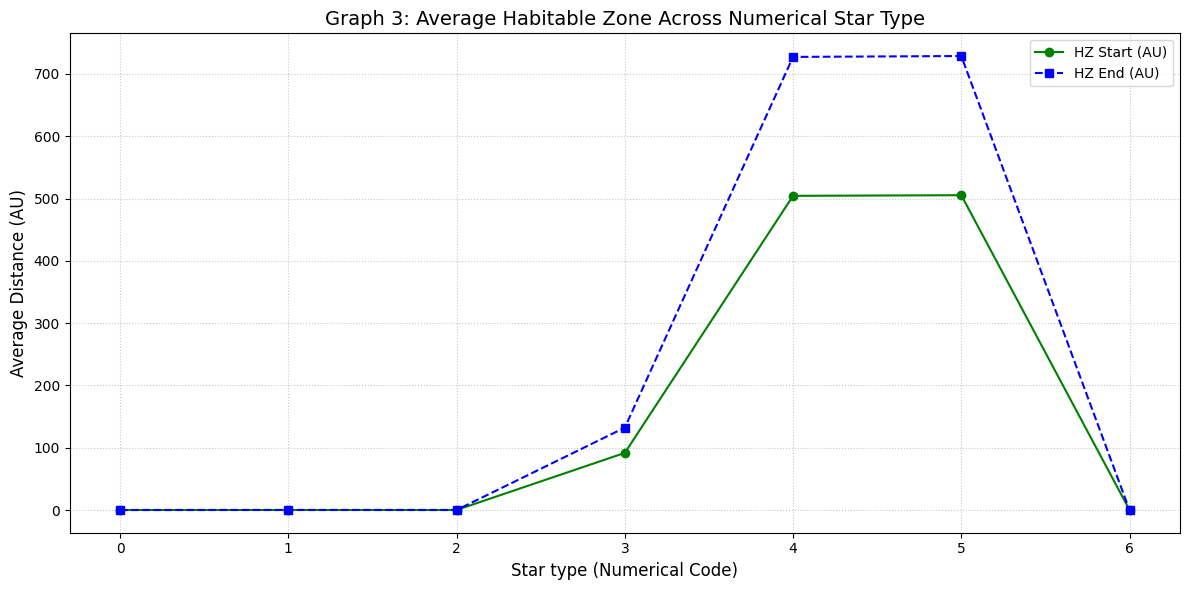

C:\Users\anish\AppData\Local\Temp\ipykernel_15528\2365170967.py:324: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


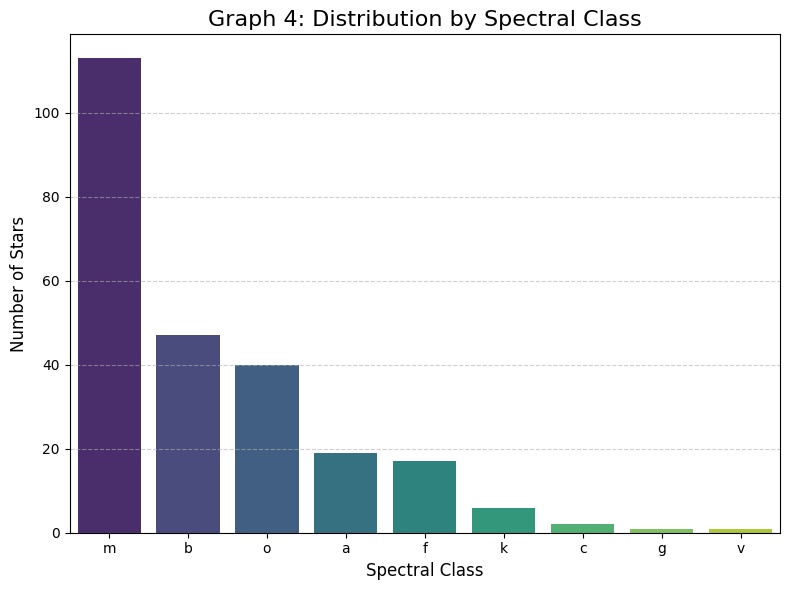

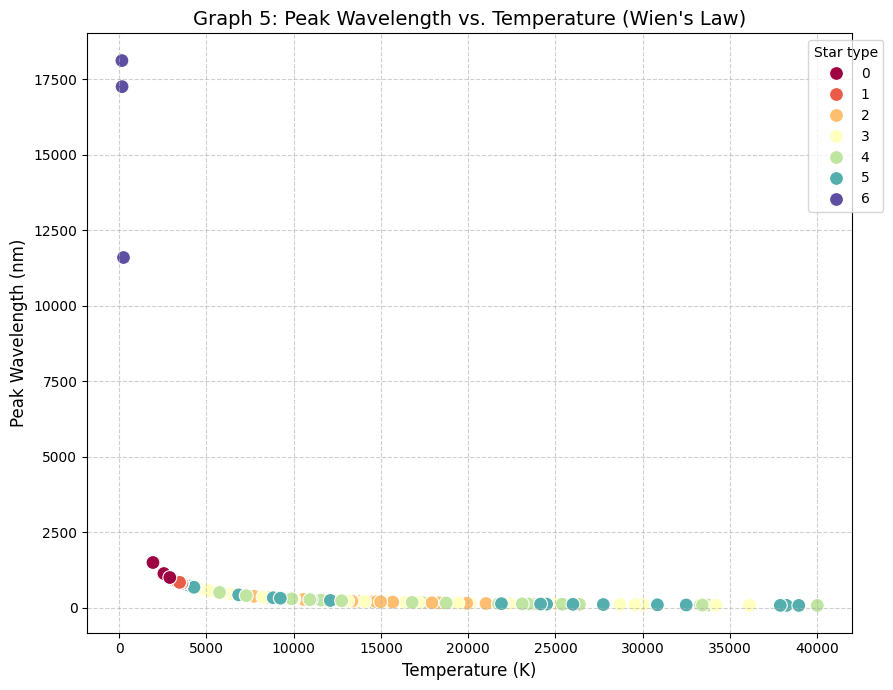

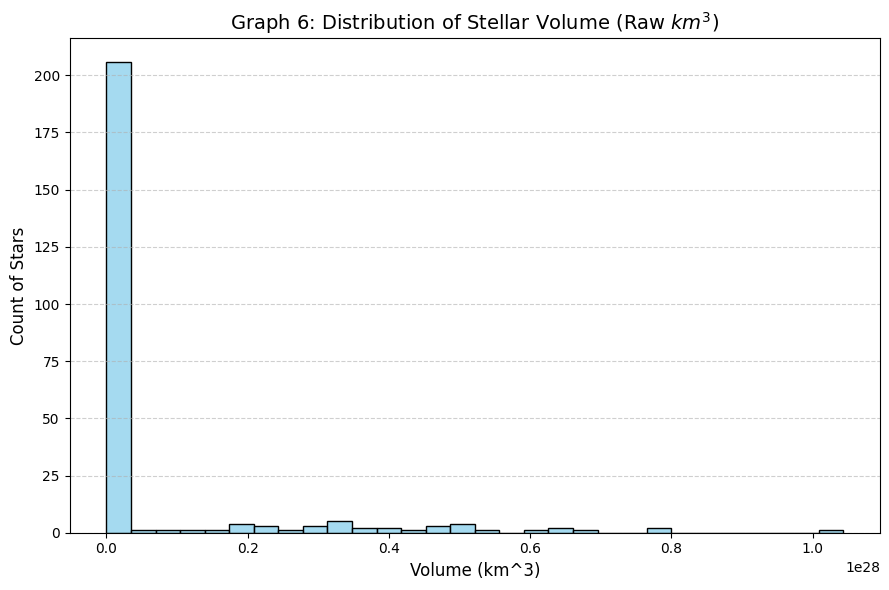

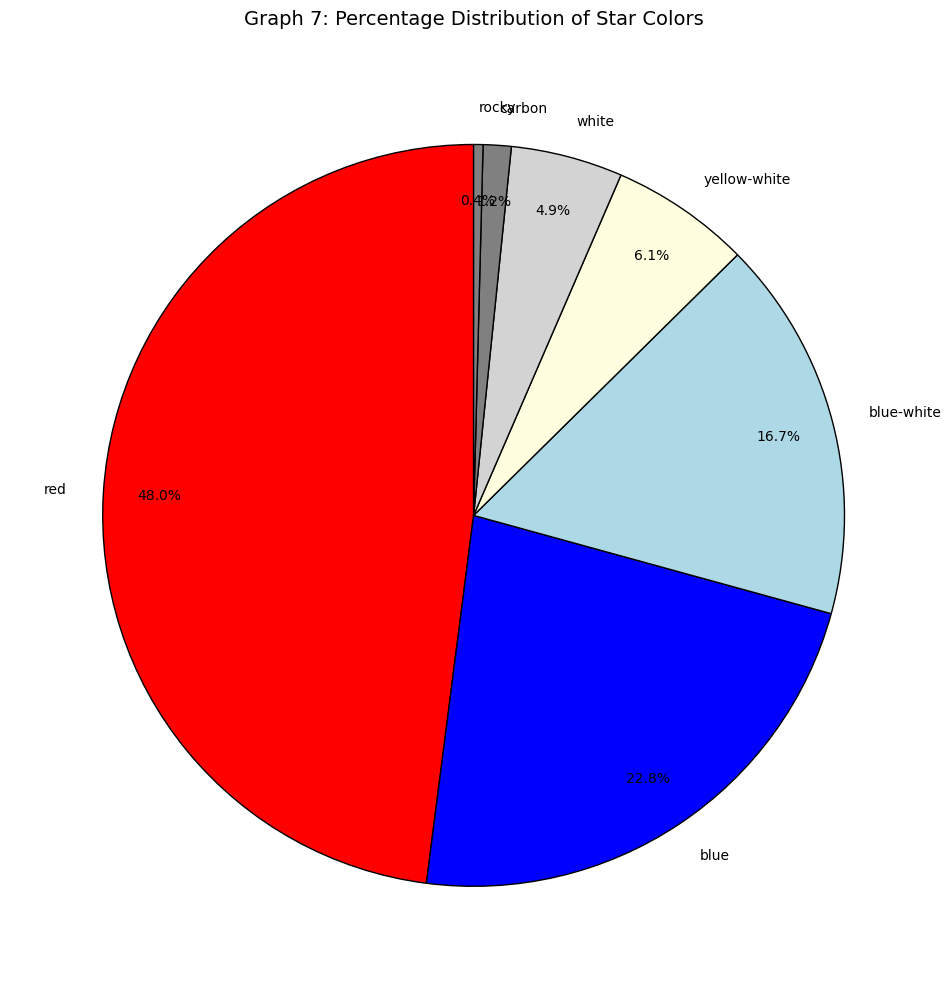

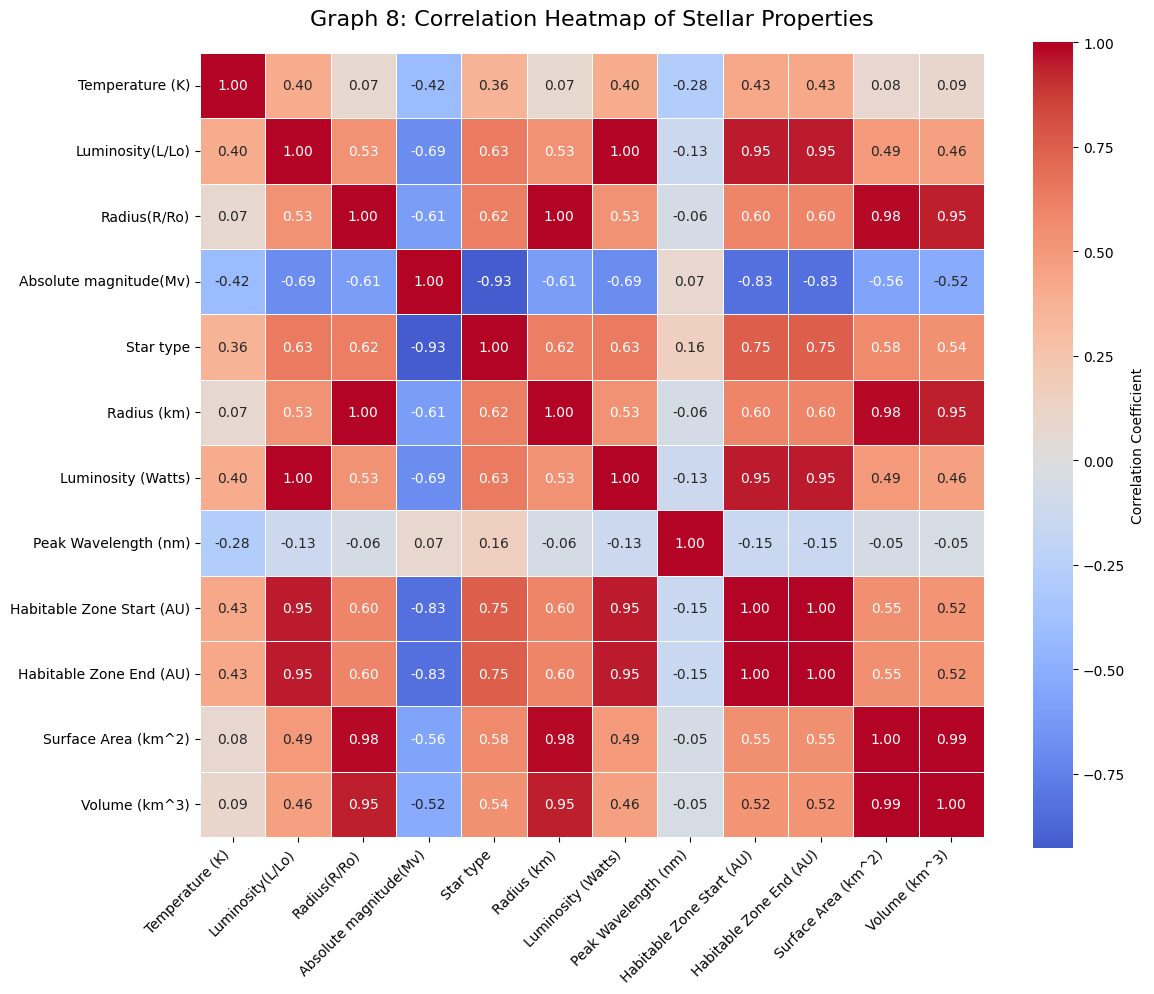

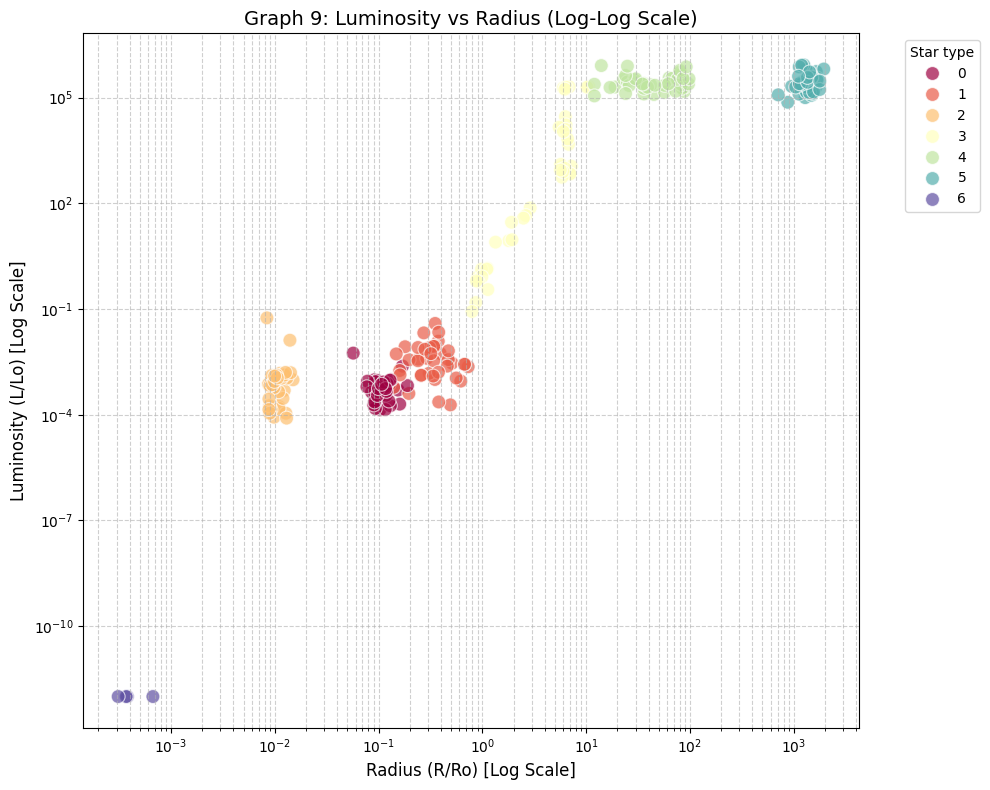

C:\Users\anish\AppData\Local\Temp\ipykernel_15528\2365170967.py:461: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


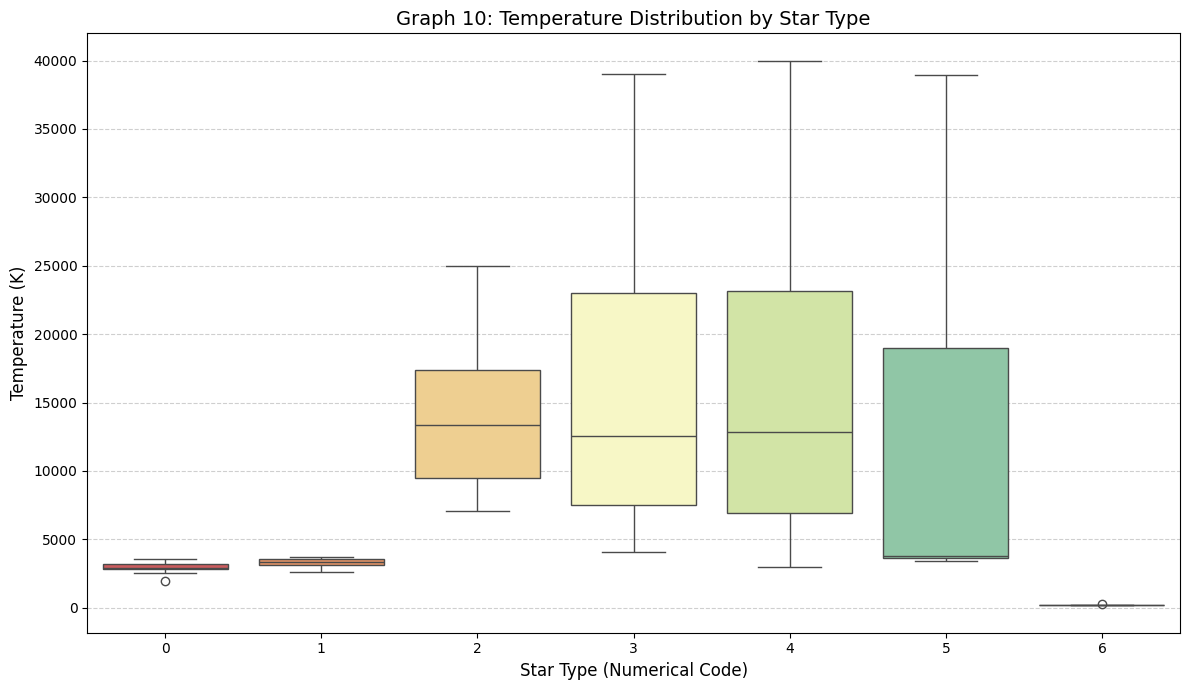

C:\Users\anish\AppData\Local\Temp\ipykernel_15528\2365170967.py:480: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


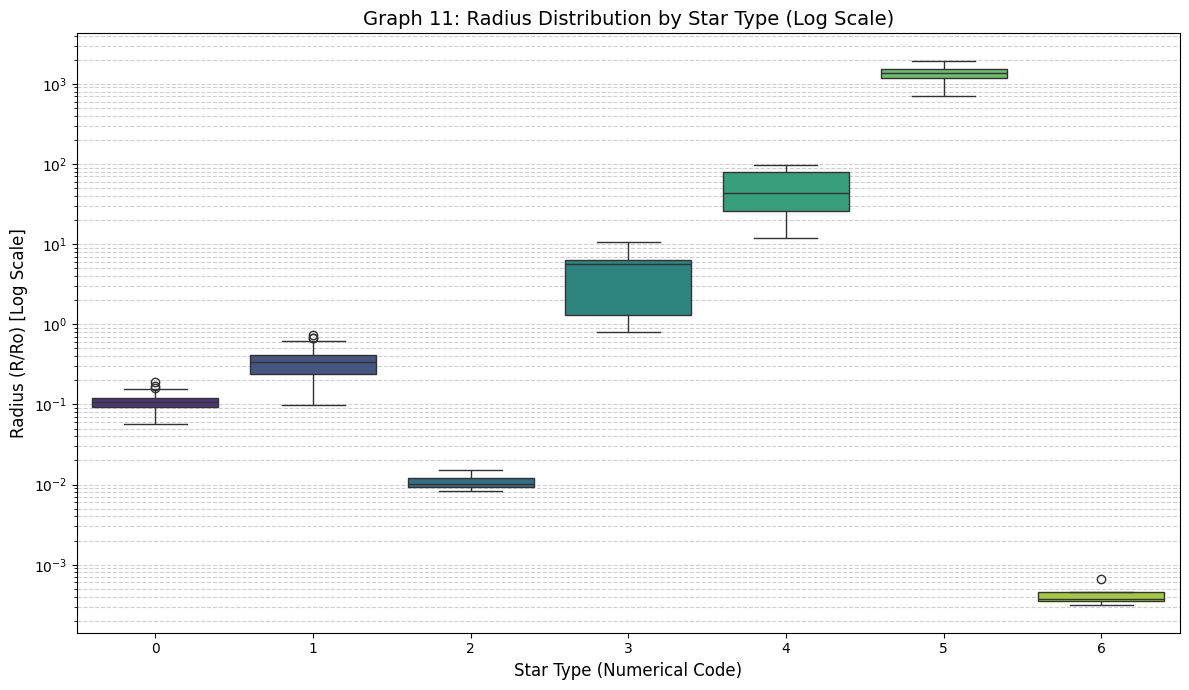

C:\Users\anish\AppData\Local\Temp\ipykernel_15528\2365170967.py:502: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


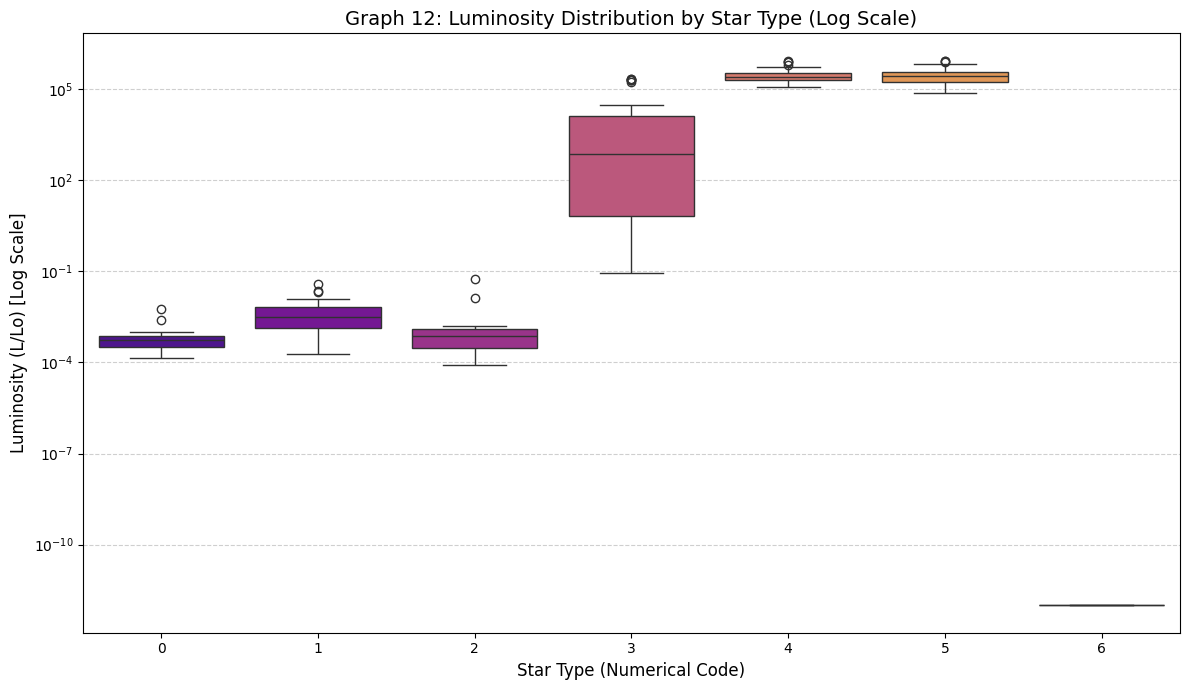

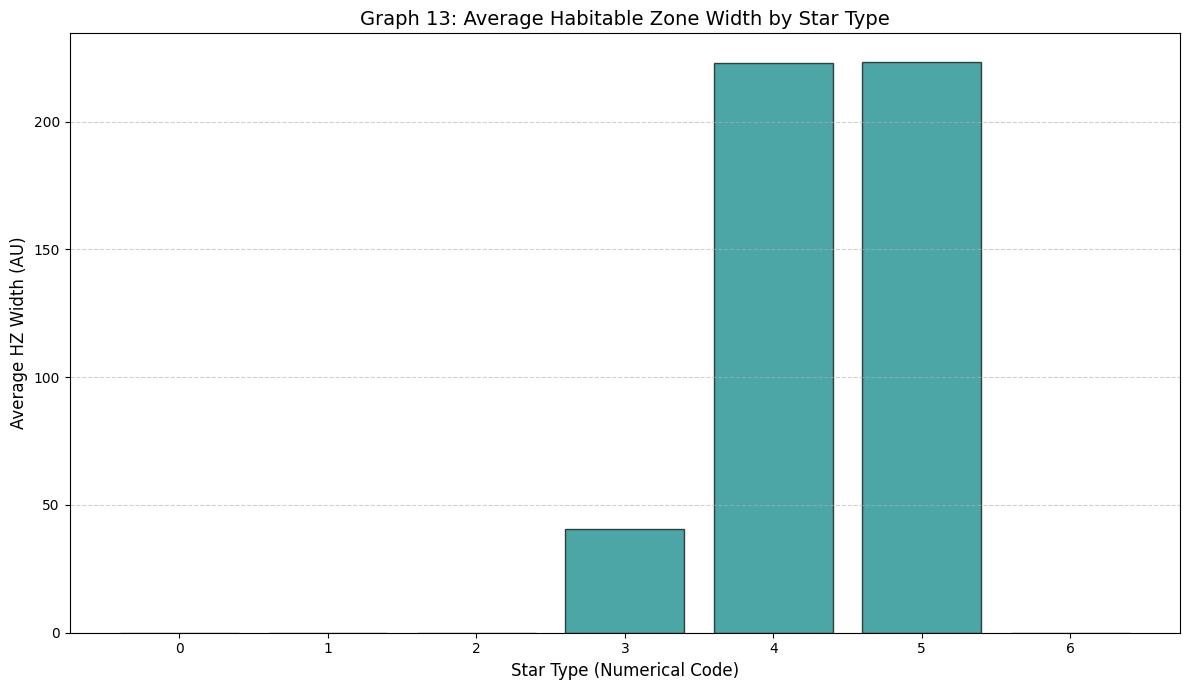

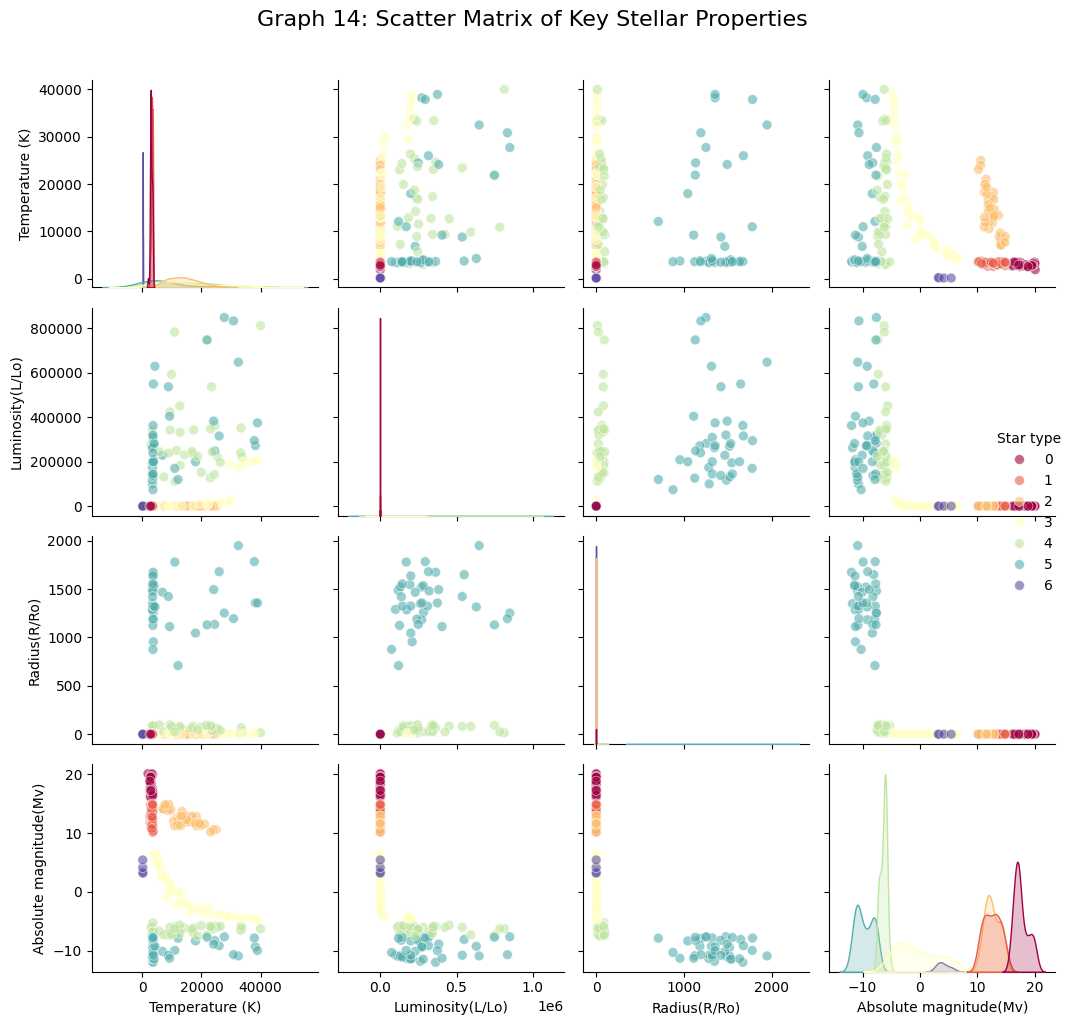

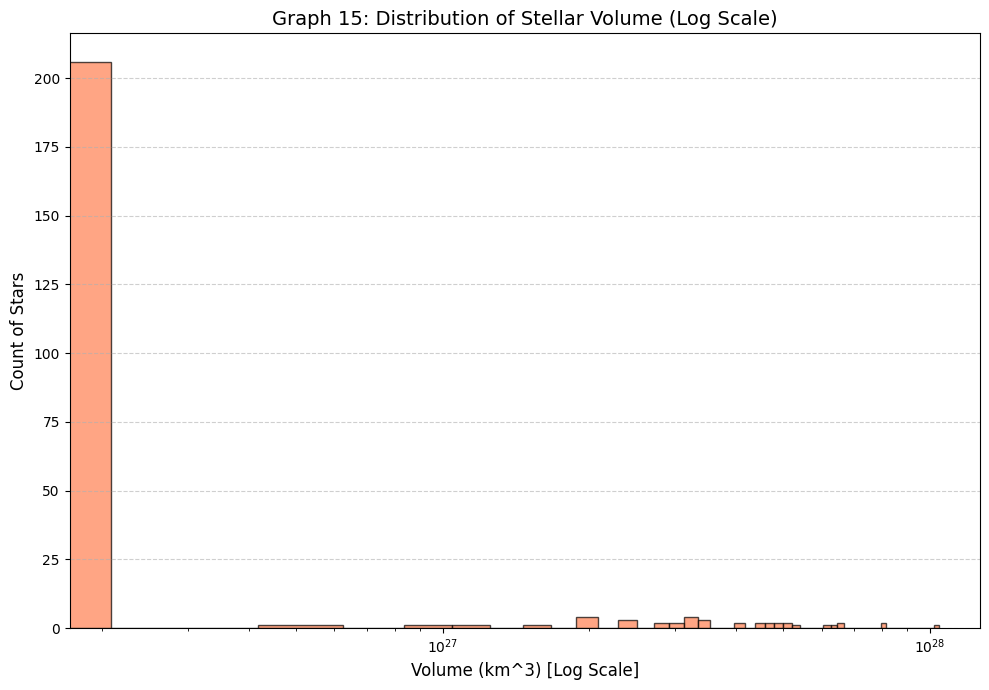

C:\Users\anish\AppData\Local\Temp\ipykernel_15528\2365170967.py:592: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


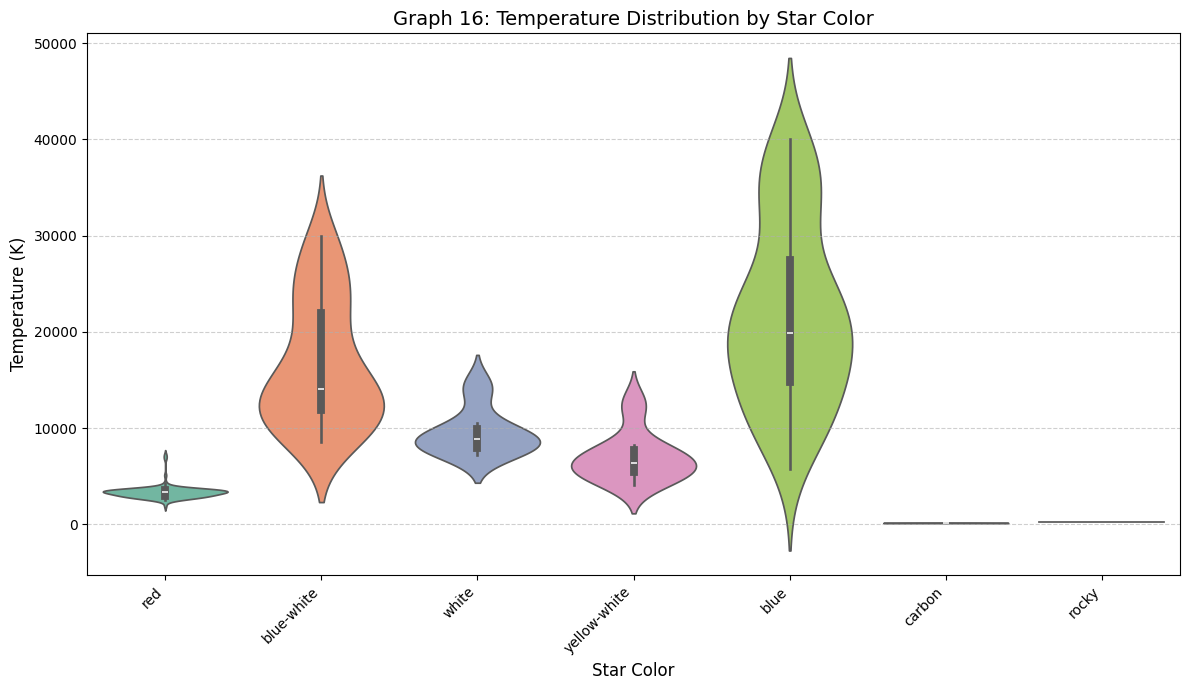

C:\Users\anish\AppData\Local\Temp\ipykernel_15528\2365170967.py:613: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


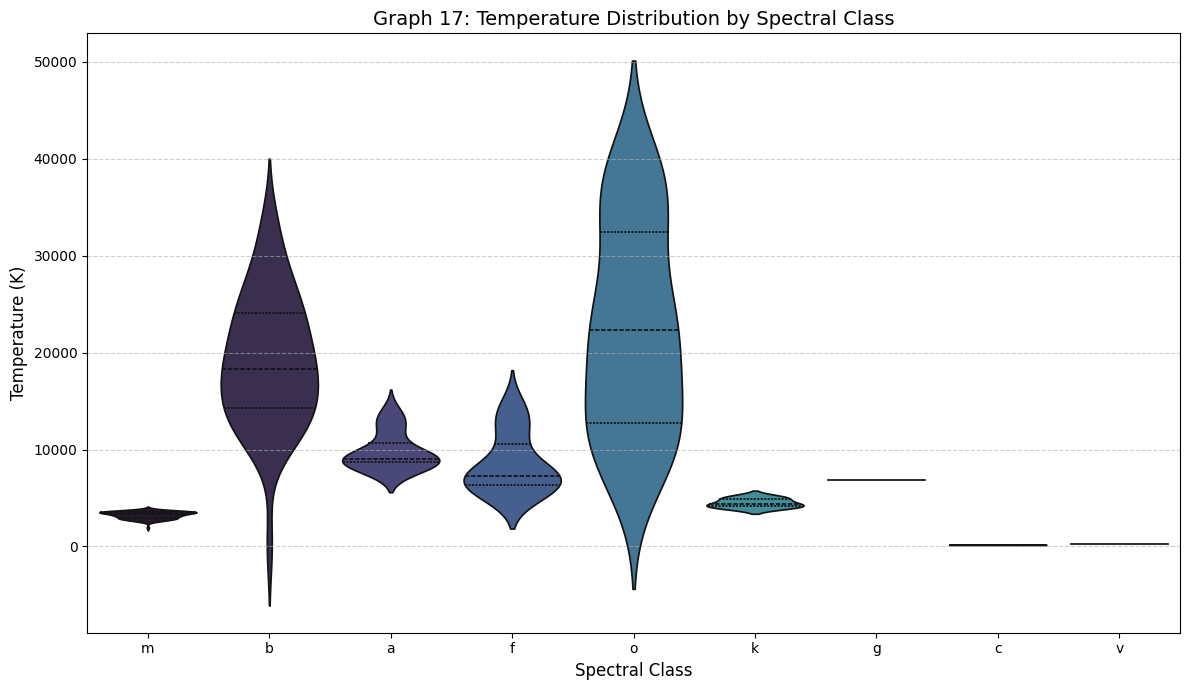

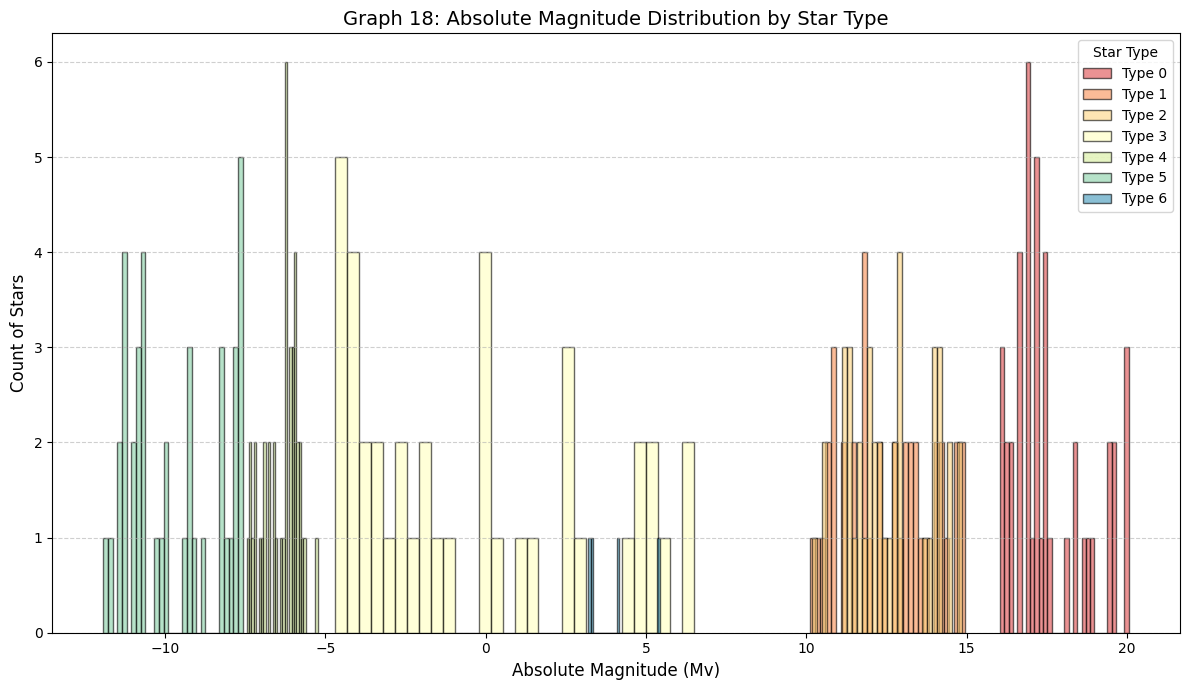


ANALYSIS COMPLETE!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', '{:.5e}'.format)

# Define the file name globally (easy use)
Name_file = 'final_star_asteroid_data_filled.csv'


def load_data(file_name):
    """Loads the CSV file into a Pandas DataFrame."""
    print("Loading data from file: {}".format(file_name))
    return pd.read_csv(file_name)


def check_duplicates(df):
    """Check for and remove duplicate rows."""
    print("\n" + "="*60)
    print("DUPLICATE CHECK")
    print("="*60)
    num_duplicates = df.duplicated().sum()
    if num_duplicates > 0:
        print(f"WARNING: {num_duplicates} duplicate rows found. Dropping them now.")
        df.drop_duplicates(inplace=True)
        print(f"Duplicates removed. New shape: {df.shape}")
    else:
        print("✓ No duplicate rows found.")
    return df


def check_missing_values(df):
    """Check for missing values and provide summary."""
    print("\n" + "="*60)
    print("MISSING VALUES CHECK")
    print("="*60)
    
    missing_count = df.isnull().sum()
    missing_percent = (df.isnull().sum() / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Column': missing_count.index,
        'Missing Count': missing_count.values,
        'Missing Percentage': missing_percent.values
    })
    
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
    
    if len(missing_df) > 0:
        print("WARNING: Missing values detected:\n")
        print(missing_df.to_string(index=False))
        return missing_df
    else:
        print("✓ No missing values found.")
        return None


def handle_missing_values(df, strategy='drop'):
    """
    Handle missing values based on specified strategy.
    
    Parameters:
    - strategy: 'drop', 'fill_mean', 'fill_median', 'fill_mode'
    """
    print("\n" + "="*60)
    print(f"HANDLING MISSING VALUES - Strategy: {strategy.upper()}")
    print("="*60)
    
    if df.isnull().sum().sum() == 0:
        print("No missing values to handle.")
        return df
    
    if strategy == 'drop':
        initial_rows = len(df)
        df = df.dropna()
        dropped_rows = initial_rows - len(df)
        print(f"Dropped {dropped_rows} rows with missing values.")
        print(f"New dataset shape: {df.shape}")
        
    elif strategy == 'fill_mean':
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            if df[col].isnull().sum() > 0:
                mean_val = df[col].mean()
                df[col].fillna(mean_val, inplace=True)
                print(f"Filled '{col}' with mean: {mean_val:.5e}")
        
        # Fill categorical with mode
        cat_cols = df.select_dtypes(include=['object']).columns
        for col in cat_cols:
            if df[col].isnull().sum() > 0:
                mode_val = df[col].mode()[0]
                df[col].fillna(mode_val, inplace=True)
                print(f"Filled '{col}' with mode: {mode_val}")
    
    elif strategy == 'fill_median':
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            if df[col].isnull().sum() > 0:
                median_val = df[col].median()
                df[col].fillna(median_val, inplace=True)
                print(f"Filled '{col}' with median: {median_val:.5e}")
        
        cat_cols = df.select_dtypes(include=['object']).columns
        for col in cat_cols:
            if df[col].isnull().sum() > 0:
                mode_val = df[col].mode()[0]
                df[col].fillna(mode_val, inplace=True)
                print(f"Filled '{col}' with mode: {mode_val}")
    
    return df


def validate_data_types(df):
    """Ensure numerical columns are actually numeric and convert if needed."""
    print("\n" + "="*60)
    print("DATA TYPE VALIDATION")
    print("="*60)
    
    expected_numeric = [
        'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 
        'Absolute magnitude(Mv)', 'Star type', 'Peak Wavelength (nm)',
        'Volume (km^3)', 'Habitable Zone Start (AU)', 'Habitable Zone End (AU)'
    ]
    
    for col in expected_numeric:
        if col in df.columns:
            if df[col].dtype == 'object':
                print(f"WARNING: '{col}' is object type. Attempting to convert to numeric...")
                df[col] = pd.to_numeric(df[col], errors='coerce')
                print(f"✓ Converted '{col}' to numeric. NaN created: {df[col].isnull().sum()}")
            else:
                print(f"✓ '{col}' is already numeric ({df[col].dtype})")
    
    return df


def validate_value_ranges(df):
    """Check for negative values and unrealistic ranges in physical quantities."""
    print("\n" + "="*60)
    print("VALUE RANGE VALIDATION")
    print("="*60)
    
    # Columns that should always be positive
    positive_cols = [
        'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 
        'Peak Wavelength (nm)', 'Volume (km^3)',
        'Habitable Zone Start (AU)', 'Habitable Zone End (AU)'
    ]
    
    issues_found = False
    
    for col in positive_cols:
        if col in df.columns:
            negative_count = (df[col] < 0).sum()
            if negative_count > 0:
                print(f"WARNING: '{col}' has {negative_count} negative values!")
                issues_found = True
            else:
                print(f"✓ '{col}' - all values are positive")
    
    # Check for unrealistic temperature ranges
    if 'Temperature (K)' in df.columns:
        temp_min = df['Temperature (K)'].min()
        temp_max = df['Temperature (K)'].max()
        print(f"\nTemperature range: {temp_min:.2f} K to {temp_max:.2f} K")
        if temp_min < 1000 or temp_max > 100000:
            print("WARNING: Some temperatures outside typical stellar range (1000-100000 K)")
    
    # Check Habitable Zone consistency
    if 'Habitable Zone Start (AU)' in df.columns and 'Habitable Zone End (AU)' in df.columns:
        hz_inconsistent = (df['Habitable Zone Start (AU)'] > df['Habitable Zone End (AU)']).sum()
        if hz_inconsistent > 0:
            print(f"\nWARNING: {hz_inconsistent} rows have HZ Start > HZ End (inconsistent)")
        else:
            print("\n✓ Habitable Zone ranges are consistent")
    
    if not issues_found:
        print("\n✓ All value ranges appear valid")
    
    return df


def check_categorical_consistency(df):
    """Check for unexpected or inconsistent categorical values."""
    print("\n" + "="*60)
    print("CATEGORICAL CONSISTENCY CHECK")
    print("="*60)
    
    categorical_cols = ['Star type', 'Star color', 'Spectral Class']
    
    for col in categorical_cols:
        if col in df.columns:
            unique_vals = df[col].unique()
            print(f"\n'{col}' has {len(unique_vals)} unique values:")
            print(f"  Values: {sorted(unique_vals)}")
            
            # Check for potential issues
            if df[col].dtype == 'object':
                # Check for extra whitespace
                whitespace_issues = df[col].str.strip() != df[col]
                if whitespace_issues.sum() > 0:
                    print(f"  WARNING: {whitespace_issues.sum()} values have leading/trailing whitespace")


def display_basic_info(df):
    """Prints the head, info, and describe summary of the DataFrame."""
    print("\n" + "="*60)
    print("BASIC DATASET INFORMATION")
    print("="*60)
    print("The dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nDataFrame Info:")
    df.info()
    print("\nStatistical Summary:")
    print(df.describe().to_string())


def standardize_case(df):
    """Converting all string columns to lowercase for data consistency."""
    print("\n" + "="*60)
    print("STANDARDIZING TEXT CASE")
    print("="*60)
    
    object_cols = df.select_dtypes(include=['object']).columns
    print("Converting columns {} to lowercase.".format(list(object_cols)))
    
    for col in object_cols:
        df[col] = df[col].str.strip().str.lower()  # Also strip whitespace
    
    print("✓ Case standardization complete")
    print("\nSample of standardized columns:")
    print(df[object_cols].head())
    return df


def check_unique(df):
    """Checks and prints unique values and counts for categorical columns."""
    print("\n" + "="*60)
    print("UNIQUE VALUE ANALYSIS")
    print("="*60)
    
    categorical_cols = ['Star type', 'Star color', 'Spectral Class']
    for col in categorical_cols:
        if col in df.columns:
            print("\nUnique values and counts for '{}':".format(col))
            print(df[col].value_counts().to_string())


def save_data_to_csv(df, output_file_name):
    """Save processed data to new CSV file."""
    df.to_csv(output_file_name, index=False)
    print("\n✓ Successfully saved: {}".format(output_file_name))


# Graph functions
def plot_1_hr_diagram_raw(df):
    """Graph 1: Scatter Plot - Hertzsprung-Russell (Mv vs Temperature)."""
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='Temperature (K)', 
        y='Absolute magnitude(Mv)', 
        hue='Star type',
        palette='Spectral', s=100, data=df)
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.title('Graph 1: H-R Diagram (Mv vs Temperature) [Raw Data]', fontsize=16)
    plt.xlabel('Surface Temperature (K) [Inverted]', fontsize=12)
    plt.ylabel('Absolute Magnitude (Mv) [Inverted]', fontsize=12)
    plt.legend(title='Star type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


def plot_2_luminosity_vs_radius_raw(df):
    """Graph 2: Scatter Plot - Luminosity vs Radius (Highly compressed plot)."""
    plt.figure(figsize=(9, 7))
    sns.scatterplot(
        x='Radius(R/Ro)', 
        y='Luminosity(L/Lo)', 
        hue='Star type',
        palette='Spectral', s=100, data=df)
    plt.title('Graph 2: Luminosity vs. Radius (Raw Data)', fontsize=14)
    plt.xlabel('Radius (R/Ro) - Highly Compressed', fontsize=12)
    plt.ylabel('Luminosity (L/Lo) - Highly Compressed', fontsize=12)
    plt.legend(title='Star type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


def plot_3_habitable_zone_line(df):
    """Graph 3: Line Plot - Average Habitable Zone Across Star Types."""
    plt.figure(figsize=(12, 6))
    df_mean = df.groupby('Star type')[['Habitable Zone Start (AU)', 'Habitable Zone End (AU)']].mean().reset_index()
    
    plt.plot(
        df_mean['Star type'], 
        df_mean['Habitable Zone Start (AU)'], 
        marker='o', linestyle='-', color='green', label='HZ Start (AU)'
    )
    plt.plot(
        df_mean['Star type'], 
        df_mean['Habitable Zone End (AU)'], 
        marker='s', linestyle='--', color='blue', label='HZ End (AU)')
    
    plt.title('Graph 3: Average Habitable Zone Across Numerical Star Type', fontsize=14)
    plt.xlabel('Star type (Numerical Code)', fontsize=12)
    plt.ylabel('Average Distance (AU)', fontsize=12)
    plt.xticks(df_mean['Star type'])
    plt.legend(loc='upper right')
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()


def plot_4_spectral_class_bar(df):
    """Graph 4: Bar Chart - Counts of stars in each Spectral Class."""
    plt.figure(figsize=(8, 6))
    class_counts = df['Spectral Class'].value_counts()
    sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
    plt.title('Graph 4: Distribution by Spectral Class', fontsize=16)
    plt.xlabel('Spectral Class', fontsize=12)
    plt.ylabel('Number of Stars', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


def plot_5_peak_wavelength_vs_temp(df):
    """Graph 5: Scatter Plot - Peak Wavelength vs. Temperature (Wien's Law)."""
    plt.figure(figsize=(9, 7))
    sns.scatterplot(
        x='Temperature (K)', 
        y='Peak Wavelength (nm)', 
        hue='Star type', 
        palette='Spectral', s=100, data=df
    )
    plt.title('Graph 5: Peak Wavelength vs. Temperature (Wien\'s Law)', fontsize=14)
    plt.xlabel('Temperature (K)', fontsize=12)
    plt.ylabel('Peak Wavelength (nm)', fontsize=12)
    plt.legend(title='Star type', bbox_to_anchor=(1.05, 1), loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


def plot_6_volume_histogram(df):
    """Graph 6: Histogram - Distribution of raw stellar Volume (km^3)."""
    plt.figure(figsize=(9, 6))
    sns.histplot(df, x='Volume (km^3)', multiple='stack', bins=30, kde=False, color='skyblue')
    plt.title('Graph 6: Distribution of Stellar Volume (Raw $km^3$)', fontsize=14)
    plt.xlabel('Volume (km^3)', fontsize=12)
    plt.ylabel('Count of Stars', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


def plot_7_star_color_pie(df):
    """Graph 7: Pie Chart - Percentage breakdown of 'Star color' with matching colors."""
    plt.figure(figsize=(10, 10))
    color_counts = df['Star color'].value_counts()
    
    # Map star color names to actual display colors
    color_mapping = {
        'red': 'red',
        'blue': 'blue',
        'white': 'lightgray',
        'yellow': 'yellow',
        'yellow-white': 'lightyellow',
        'orange': 'orange',
        'blue-white': 'lightblue',
        'pale yellow orange': 'peachpuff',
        'yellowish': 'khaki',
        'orange-red': 'orangered',
        'whitish': 'whitesmoke',
        'yellowish white': 'lemonchiffon',
        'blue white': 'aliceblue'
    }
    
    # Create list of colors matching the order of color_counts
    pie_colors = [color_mapping.get(color, 'gray') for color in color_counts.index]
    
    # Create the pie chart with matching colors
    plt.pie(
        color_counts.values, 
        labels=color_counts.index, 
        colors=pie_colors,
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black'},
        pctdistance=0.85,  # Distance of percentage labels from center
        labeldistance=1.1)  # Distance of labels from center
    
    plt.title('Graph 7: Percentage Distribution of Star Colors', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()


def plot_8_correlation_heatmap(df):
    """Graph 8: Correlation Heatmap - Shows relationships between all numerical features."""
    # Select only numerical columns for correlation
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    correlation_matrix = df[numeric_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        correlation_matrix, 
        annot=True,  # Show correlation values
        fmt='.2f',  # Format to 2 decimal places
        cmap='coolwarm',  # Red for positive, blue for negative correlation
        center=0,  # Center colormap at 0
        square=True,  # Make cells square-shaped
        linewidths=0.5,
        cbar_kws={'label': 'Correlation Coefficient'})
    
    plt.title('Graph 8: Correlation Heatmap of Stellar Properties', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


def plot_9_luminosity_radius_log(df):
    """Graph 9: Luminosity vs Radius with LOG SCALE - Better visualization of compressed data."""
    plt.figure(figsize=(10, 8))
    
    # Create scatter plot with log scales
    sns.scatterplot(
        x='Radius(R/Ro)', 
        y='Luminosity(L/Lo)', 
        hue='Star type',
        palette='Spectral', 
        s=100, 
        alpha=0.7,
        data=df)
    
    # Apply logarithmic scales to both axes
    plt.xscale('log')
    plt.yscale('log')
    
    plt.title('Graph 9: Luminosity vs Radius (Log-Log Scale)', fontsize=14)
    plt.xlabel('Radius (R/Ro) [Log Scale]', fontsize=12)
    plt.ylabel('Luminosity (L/Lo) [Log Scale]', fontsize=12)
    plt.legend(title='Star type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6, which='both')
    plt.tight_layout()
    plt.show()


def plot_10_temperature_boxplot_by_type(df):
    """Graph 10: Box Plot - Temperature distribution for each Star Type."""
    plt.figure(figsize=(12, 7))
    
    # Create box plot showing temperature distribution by star type
    sns.boxplot(
        x='Star type', 
        y='Temperature (K)', 
        data=df, 
        palette='Spectral')
    
    plt.title('Graph 10: Temperature Distribution by Star Type', fontsize=14)
    plt.xlabel('Star Type (Numerical Code)', fontsize=12)
    plt.ylabel('Temperature (K)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


def plot_11_radius_boxplot_by_type(df):
    """Graph 11: Box Plot - Radius distribution for each Star Type."""
    plt.figure(figsize=(12, 7))
    
    # Create box plot showing radius distribution by star type
    sns.boxplot(
        x='Star type', 
        y='Radius(R/Ro)', 
        data=df, 
        palette='viridis')
    
    # Use log scale for y-axis due to large range
    plt.yscale('log')
    
    plt.title('Graph 11: Radius Distribution by Star Type (Log Scale)', fontsize=14)
    plt.xlabel('Star Type (Numerical Code)', fontsize=12)
    plt.ylabel('Radius (R/Ro) [Log Scale]', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6, which='both')
    plt.tight_layout()
    plt.show()


def plot_12_luminosity_boxplot_by_type(df):
    """Graph 12: Box Plot - Luminosity distribution for each Star Type."""
    plt.figure(figsize=(12, 7))
    
    # Create box plot showing luminosity distribution by star type
    sns.boxplot(
        x='Star type', 
        y='Luminosity(L/Lo)', 
        data=df, 
        palette='plasma')
    
    # Use log scale for y-axis due to extreme range
    plt.yscale('log')
    
    plt.title('Graph 12: Luminosity Distribution by Star Type (Log Scale)', fontsize=14)
    plt.xlabel('Star Type (Numerical Code)', fontsize=12)
    plt.ylabel('Luminosity (L/Lo) [Log Scale]', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6, which='both')
    plt.tight_layout()
    plt.show()


def plot_13_habitable_zone_width(df):
    """Graph 13: Bar Chart - Habitable Zone Width (HZ End - HZ Start) by Star Type."""
    plt.figure(figsize=(12, 7))
    
    # Calculate habitable zone width for each star
    df['HZ Width (AU)'] = df['Habitable Zone End (AU)'] - df['Habitable Zone Start (AU)']
    
    # Group by star type and calculate mean width
    hz_width_mean = df.groupby('Star type')['HZ Width (AU)'].mean().reset_index()
    
    # Create bar chart
    plt.bar(
        hz_width_mean['Star type'], 
        hz_width_mean['HZ Width (AU)'], 
        color='teal', 
        edgecolor='black', 
        alpha=0.7)
    
    plt.title('Graph 13: Average Habitable Zone Width by Star Type', fontsize=14)
    plt.xlabel('Star Type (Numerical Code)', fontsize=12)
    plt.ylabel('Average HZ Width (AU)', fontsize=12)
    plt.xticks(hz_width_mean['Star type'])
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


def plot_14_scatter_matrix(df):
    """Graph 14: Scatter Matrix - Pairwise relationships between key stellar properties."""
    # Select key columns for scatter matrix
    key_cols = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
    
    # Create subset dataframe
    df_subset = df[key_cols + ['Star type']].copy()
    
    # Create pairplot (scatter matrix)
    pair_plot = sns.pairplot(
        df_subset, 
        hue='Star type', 
        palette='Spectral',
        diag_kind='kde',  # Show distribution on diagonal
        plot_kws={'alpha': 0.6, 's': 50},
        corner=False)
    
    pair_plot.fig.suptitle('Graph 14: Scatter Matrix of Key Stellar Properties', 
                           fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


def plot_15_volume_histogram_log(df):
    """Graph 15: Histogram - Stellar Volume distribution with LOG SCALE for better visualization."""
    plt.figure(figsize=(10, 7))
    
    # Create histogram with log scale on x-axis
    plt.hist(df['Volume (km^3)'], bins=50, color='coral', edgecolor='black', alpha=0.7)
    
    # Apply log scale to x-axis
    plt.xscale('log')
    
    plt.title('Graph 15: Distribution of Stellar Volume (Log Scale)', fontsize=14)
    plt.xlabel('Volume (km^3) [Log Scale]', fontsize=12)
    plt.ylabel('Count of Stars', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


def plot_16_temperature_vs_color(df):
    """Graph 16: Violin Plot - Temperature distribution for each Star Color."""
    plt.figure(figsize=(12, 7))
    
    # Create violin plot showing temperature distribution by star color
    sns.violinplot(
        x='Star color', 
        y='Temperature (K)', 
        data=df, 
        palette='Set2',
        inner='box')  # Show box plot inside violin
    
    plt.title('Graph 16: Temperature Distribution by Star Color', fontsize=14)
    plt.xlabel('Star Color', fontsize=12)
    plt.ylabel('Temperature (K)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


def plot_17_spectral_class_temperature(df):
    """Graph 17: Violin Plot - Temperature distribution for each Spectral Class."""
    plt.figure(figsize=(12, 7))
    
    # Create violin plot showing temperature distribution by spectral class
    sns.violinplot(
        x='Spectral Class', 
        y='Temperature (K)', 
        data=df, 
        palette='mako',
        inner='quartile')  # Show quartiles inside violin
    
    plt.title('Graph 17: Temperature Distribution by Spectral Class', fontsize=14)
    plt.xlabel('Spectral Class', fontsize=12)
    plt.ylabel('Temperature (K)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


def plot_18_magnitude_histogram_by_type(df):
    """Graph 18: Stacked Histogram - Absolute Magnitude distribution by Star Type."""
    plt.figure(figsize=(12, 7))
    
    # Create stacked histogram by star type
    star_types = df['Star type'].unique()
    colors = sns.color_palette('Spectral', len(star_types))
    
    for i, star_type in enumerate(sorted(star_types)):
        subset = df[df['Star type'] == star_type]
        plt.hist(
            subset['Absolute magnitude(Mv)'], 
            bins=30, 
            alpha=0.6, 
            label='Type {}'.format(star_type),
            color=colors[i],
            edgecolor='black')
    
    plt.title('Graph 18: Absolute Magnitude Distribution by Star Type', fontsize=14)
    plt.xlabel('Absolute Magnitude (Mv)', fontsize=12)
    plt.ylabel('Count of Stars', fontsize=12)
    plt.legend(title='Star Type', loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    
    print("\n" + "="*60)
    print("STAR DATA ANALYSIS PIPELINE")
    print("="*60)
    
    # 1. Load Data
    data = load_data(Name_file)
    
    # 2. Check for duplicates
    data = check_duplicates(data)
    
    # 3. Check for missing values
    missing_info = check_missing_values(data)
    
    # 4. Handle missing values (change strategy as needed: 'drop', 'fill_mean', 'fill_median')
    if missing_info is not None:
        data = handle_missing_values(data, strategy='drop')  # Change strategy here
    
    # 5. Validate data types
    data = validate_data_types(data)
    
    # 6. Display basic information (head, info, describe)
    display_basic_info(data)
    
    # 7. Validate value ranges
    data = validate_value_ranges(data)
    
    # 8. Standardize case for String Columns
    data = standardize_case(data)
    
    # 9. Check categorical consistency
    check_categorical_consistency(data)
    
    # 10. Checking for Unique Values
    check_unique(data)
    
    # 11. Save the processed DataFrame to a new file
    save_data_to_csv(data, 'final_processed_star_data.csv')
    

    
    # Generate all graphs
    plot_1_hr_diagram_raw(data)
    plot_2_luminosity_vs_radius_raw(data)
    plot_3_habitable_zone_line(data)
    plot_4_spectral_class_bar(data)
    plot_5_peak_wavelength_vs_temp(data)
    plot_6_volume_histogram(data)
    plot_7_star_color_pie(data)
    plot_8_correlation_heatmap(data)
    plot_9_luminosity_radius_log(data)
    plot_10_temperature_boxplot_by_type(data)
    plot_11_radius_boxplot_by_type(data)
    plot_12_luminosity_boxplot_by_type(data)
    plot_13_habitable_zone_width(data)
    plot_14_scatter_matrix(data)
    plot_15_volume_histogram_log(data)
    plot_16_temperature_vs_color(data)
    plot_17_spectral_class_temperature(data)
    plot_18_magnitude_histogram_by_type(data)
    